Notebook to make figures

**1) FilPHANGS step by step figure**

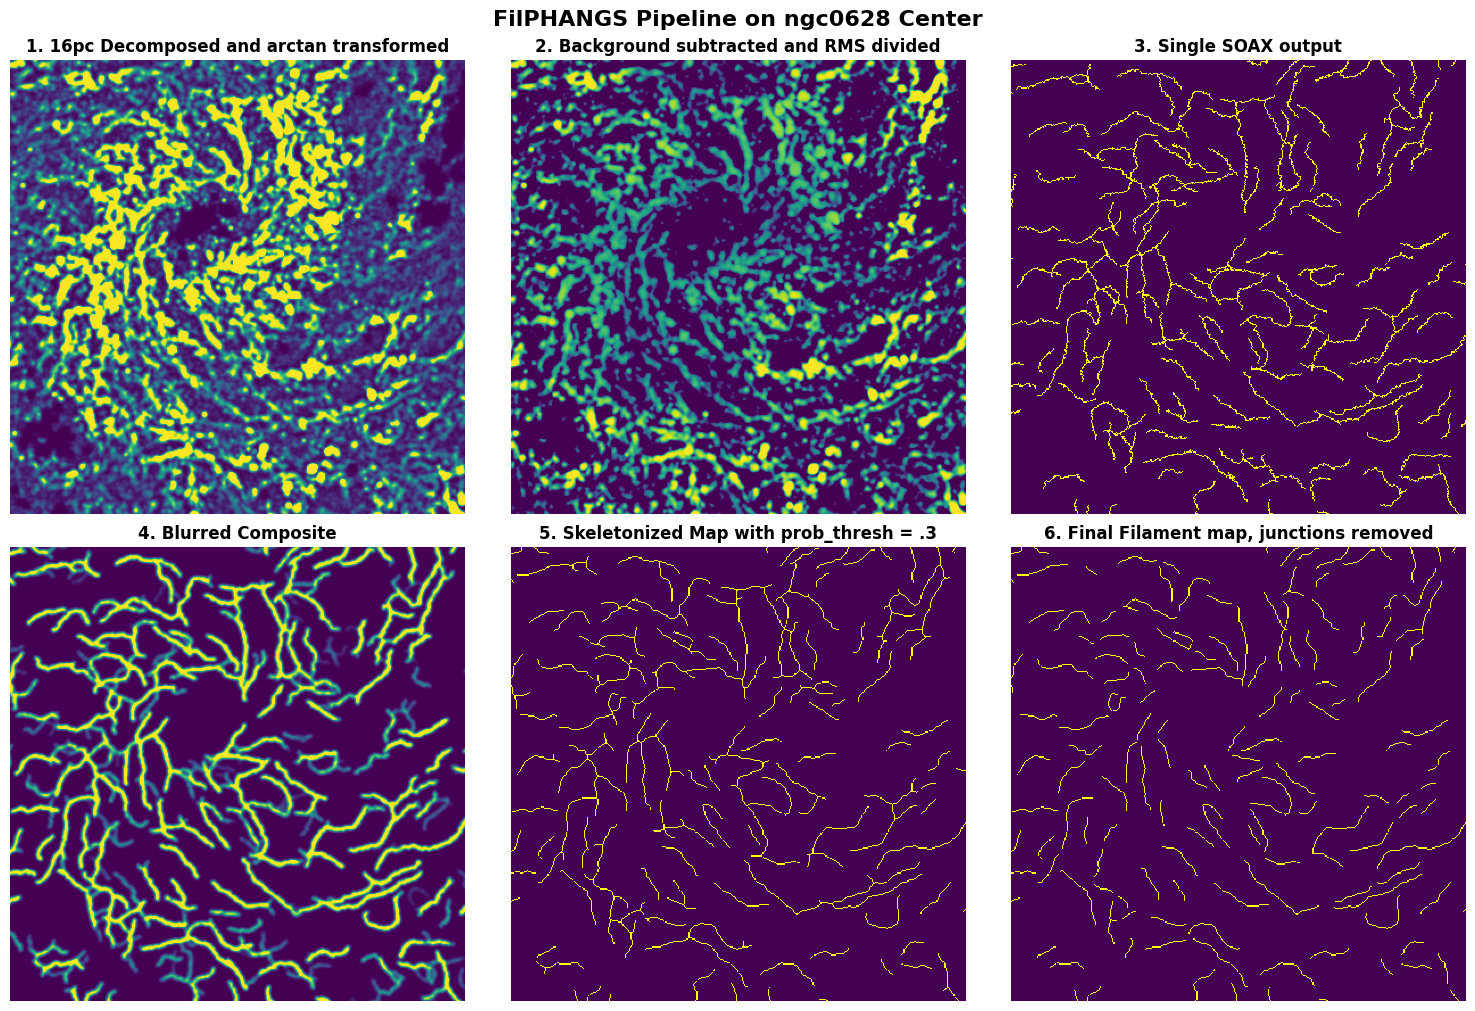

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from PIL import Image
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter, zoom
label = "ngc0628"
scale = 16

# Define the file paths
CDD_path = rf"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\{label}\CDD\{label}_JWST_F770W_starsub_CDDss00{scale}pc.fits"
Processed_image_path = rf"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\{label}\BkgSubDivRMS\{label}_JWST_F770W_starsub_CDDss00{scale}pc_BkgSubDivRMS.fits"
Interpolated_path = rf"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\{label}\SoaxOutput\{scale}pc\{label}_JWST_F770W_starsub_CDDss00{scale}pc_Blocked--ridge0.02375--stretch1.750.fits"
blurred_path = rf"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\{label}\Composites\{label}_JWST_F770W_starsub_CDDss00{scale}pc_CompositeBlur.fits"
final_path_1 = rf"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\{label}\Composites\{label}_JWST_F770W_starsub_CDDss00{scale}pc_Composite_0.3.fits"
final_path_2 = rf"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\{label}\Composites\{label}_JWST_F770W_starsub_CDDss00{scale}pc_Composite_0.3_JR.fits"

# Load FITS data
def load_fits_data(path):
    with fits.open(path) as hdul:
        data = hdul[0].data
    return data

# Load PNG data
def load_png_data(path):
    img = Image.open(path).convert("L")  # Convert to grayscale
    return np.array(img)

# Detect binary images
def is_binary(image):
    unique_values = np.unique(image)
    return len(unique_values) <= 2

# List of paths and corresponding titles
image_paths = [
    (CDD_path, "1. 16pc Decomposed and arctan transformed", "fits"),
    (Processed_image_path, "2. Background subtracted and RMS divided", "fits"),
    (Interpolated_path, "3. Single SOAX output", "fits"),
    (blurred_path, "4. Blurred Composite", "fits"),
    (final_path_1, "5. Skeletonized Map with prob_thresh = .3", "fits"),
    (final_path_2, "6. Final Filament map, junctions removed", "fits"),

]

size = 400
start_x = 700
start_y = 900

# Load all images
images = []
titles = []
for path, title, filetype in image_paths:
    if filetype == "fits":
        images.append(load_fits_data(path))
    elif filetype == "png":
        images.append(load_png_data(path))
    titles.append(title)

# Define the colormap for binary images
binary_cmap = ListedColormap([(68/255, 1/255, 84/255), (1, 1, 0)])  # Dark purple and yellow

# Create the figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

for ax, image, title in zip(axes, images, titles):
    if ("3" in title) or ("5" in title) or ("6" in title) and (str(scale) not in title):
        ax.imshow(image[start_y:start_y + size,start_x:start_x + size], cmap=binary_cmap, origin="lower", vmin=0, vmax=1)
    elif ("4" in title):
        norm_image = np.clip(image, np.percentile(image, 2), np.percentile(image, 98))
        ax.imshow(norm_image[start_y:start_y + size,start_x:start_x + size], origin="lower")    
    else:
        if is_binary(image):
            ax.imshow(image, cmap=binary_cmap, origin="lower")
        else:
            # Normalize and enhance non-binary images
            norm_image = np.clip(image, np.percentile(image, 2), np.percentile(image, 98))
            ax.imshow(norm_image[start_y:start_y + size,start_x:start_x + size], cmap="viridis", origin="lower")
    ax.set_title(title, fontsize=12, weight='bold')
    ax.axis("off")

# Add a global title
fig.suptitle("FilPHANGS Pipeline on ngc0628 Center", fontsize=16, weight='bold')
plt.savefig("process_figure_binary_corrected.png", dpi=300)
plt.show()


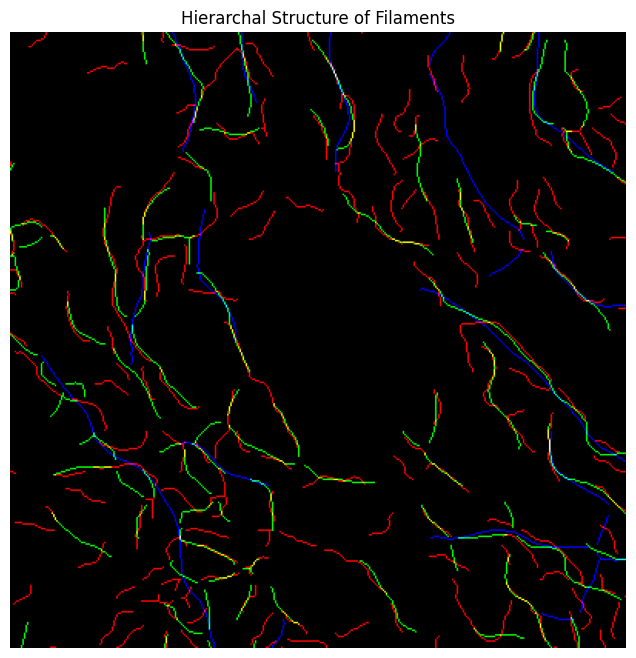

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Load the three FITS files
image_r_data = fits.getdata(r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\ngc1672\Composites\ngc1672_JWST_F770W_starsub_CDDss0032pc_Composite_0.15.fits")
image_g_data = fits.getdata(r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\ngc1672\Composites\ngc1672_JWST_F770W_starsub_CDDss0064pc_Composite_0.15.fits")
image_b_data = fits.getdata(r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\ngc1672\Composites\ngc1672_JWST_F770W_starsub_CDDss0128pc_Composite_0.15.fits")

# image_r_data = fits.getdata(r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\ngc1672\SyntheticMap\SyntheticMap_32pc.fits")
# image_g_data = fits.getdata(r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\ngc1672\SyntheticMap\SyntheticMap_64pc.fits")
# image_b_data = fits.getdata(r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\ngc1672\SyntheticMap\SyntheticMap_128pc.fits")
size = 400
start_x = 800
start_y = 900

# Check if all images have the same dimensions
if image_r_data.shape != image_g_data.shape or image_g_data.shape != image_b_data.shape:
    raise ValueError("All images must have the same dimensions.")

# Normalize the images to fit in the range [0, 255]
def normalize(image):
    image_min = np.min(image)
    image_max = np.max(image)
    return ((image - image_min) / (image_max - image_min) * 255).astype(np.uint8)

image_r = normalize(image_r_data)
image_g = normalize(image_g_data)
image_b = normalize(image_b_data)

# Create an empty array for the combined image with 3 color channels
height, width = image_r.shape
combined_image = np.zeros((height, width, 3), dtype=np.uint8)

# Assign the red, green, and blue channels
combined_image[..., 0] = image_r  # Red channel
combined_image[..., 1] = image_g  # Green channel
combined_image[..., 2] = image_b  # Blue channel

# Display the combined image
plt.figure(figsize=(8, 8))
plt.imshow(combined_image[start_y:start_y + size,start_x:start_x + size])
plt.axis('off')
plt.title('Hierarchal Structure of Filaments')
plt.show()


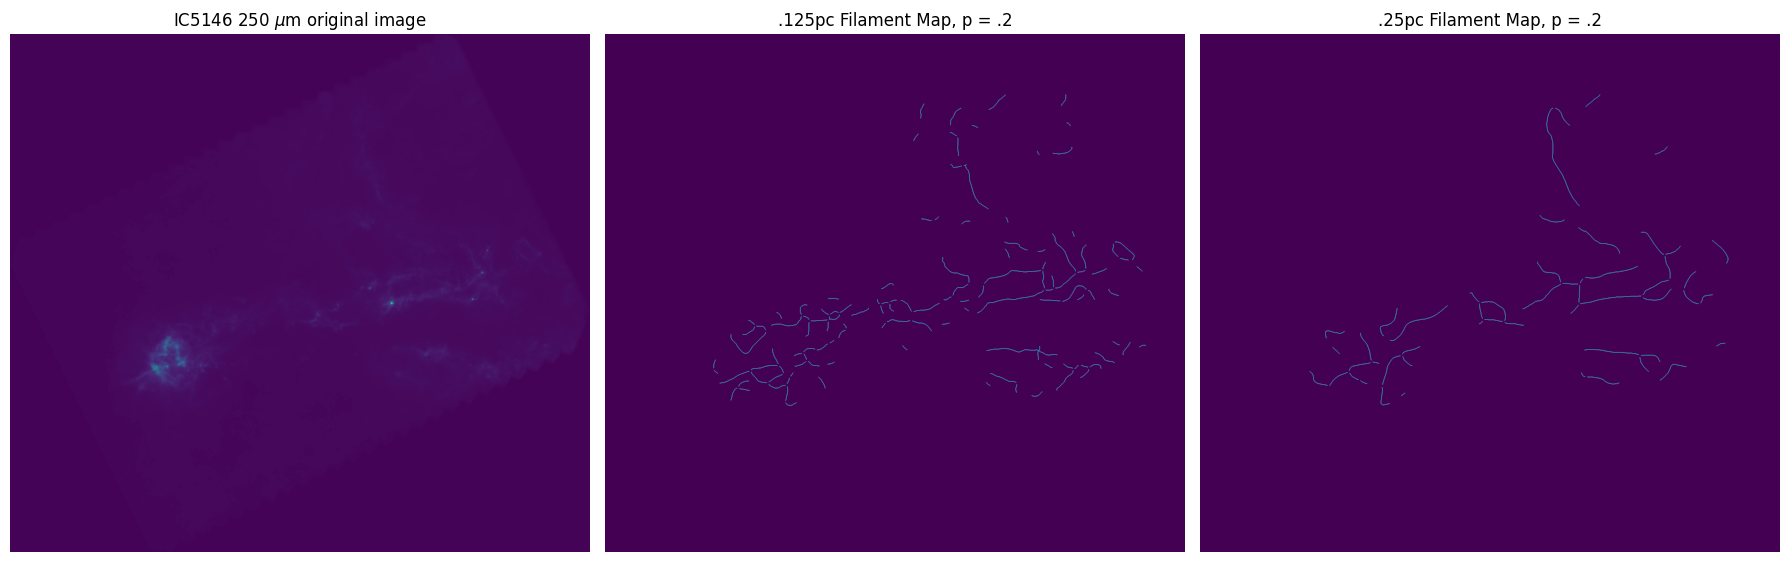

<Figure size 640x480 with 0 Axes>

In [11]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Paths to the FITS files
file_path_1 = r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\OriginalImages\IC5146_Herschel_PSW.fits"
file_path_2 = r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\IC5146\Composites\IC5146_Herschel_PSW_CDDss0.125pc_Composite_0.2.fits"
file_path_3 = r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\IC5146\Composites\IC5146_Herschel_PSW_CDDss0.25pc_Composite_0.2.fits"
file_path_4 = r"C:\Users\HP\Documents\JHU_Academics\Research\FilPHANGS\IC5146\Composites\IC5146_Herschel_PSW_CDDss00.5pc_Composite_0.2.fits"

# Function to load and normalize FITS data
def load_fits_data(file_path, n, normalize):
    with fits.open(file_path) as hdul:
        image_data = hdul[n].data

    # Replace NaNs with 0 and normalize the image
    image_data = np.nan_to_num(image_data)
    if normalize:
        image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
    return image_data

# Load the three images
image1 = load_fits_data(file_path_1, 1, False)
image2 = load_fits_data(file_path_2, 0, True)
image3 = load_fits_data(file_path_3, 0, True)
image4 = load_fits_data(file_path_4, 0, True)

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust for three images

# First image
axes[0].imshow(image1, origin='lower')  
axes[0].axis('off')  # Turn off axes
axes[0].set_title(r"IC5146 250 $\mu$m original image")

# Second image
axes[1].imshow(image2, origin='lower')  
axes[1].axis('off')  # Turn off axes
axes[1].set_title(".125pc Filament Map, p = .2")

# Third image
axes[2].imshow(image3, origin='lower')  
axes[2].axis('off')  # Turn off axes
axes[2].set_title(".25pc Filament Map, p = .2")

plt.tight_layout()
plt.show()


# axes[3].imshow(image4, origin='lower')  # Third image
# axes[3].axis('off')  # Turn off axes

plt.tight_layout()
plt.show()


✅ 190 valid circular regions (>=50% diff or bright, excluding dark regions).
📁 Figure saved to: C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc0628_F770W\Source_Removal\ValidatedCircles_700_800_Overlay.png


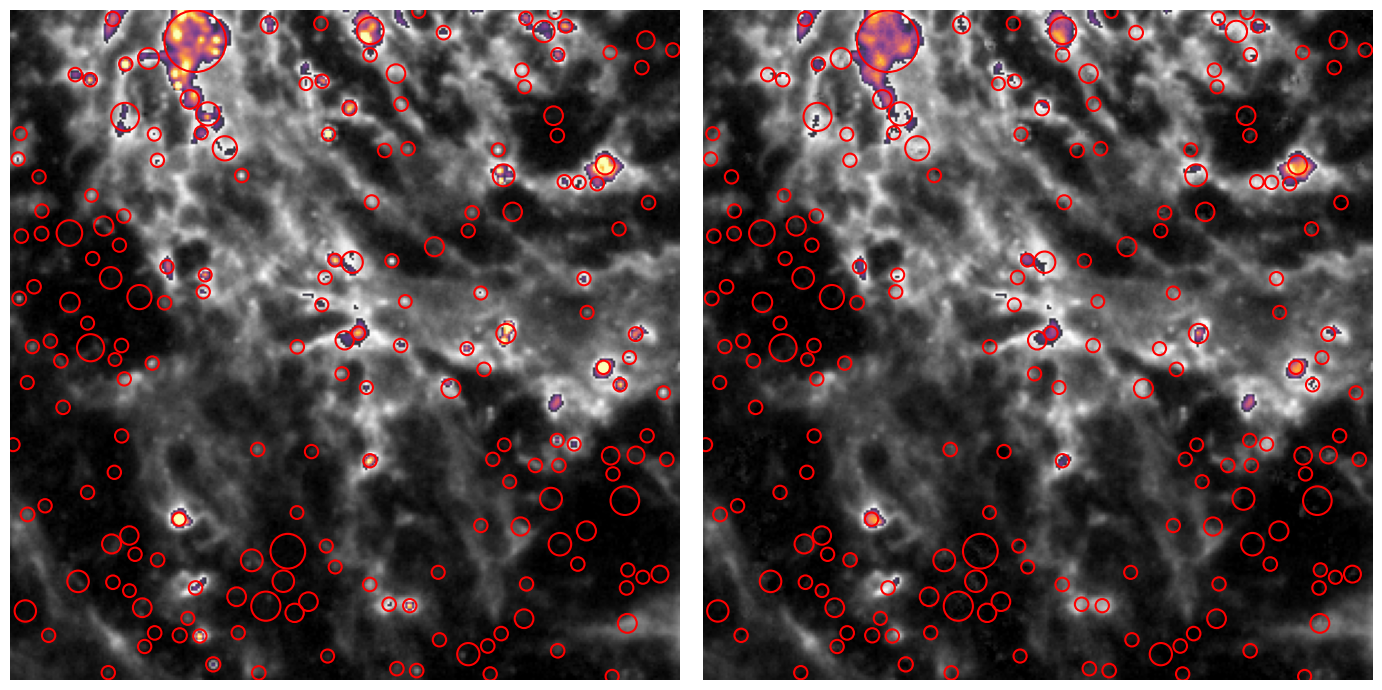

In [30]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label
from matplotlib.patches import Circle
import os
from skimage.draw import disk

# --- File Paths ---
source_rem_path = r"C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc0628_F770W\Source_Removal\OriginalImageSourcesRemoved.fits"
orig_img_path = r"C:\Users\jhoffm72\Documents\FilPHANGS\Data\OriginalImages\ngc0628_F770W_JWST_Emission_starsub.fits"
mask_path = r"C:\Users\jhoffm72\Documents\FilPHANGS\Data\ngc0628_F770W\Source_Removal\_CDDfs0004pix_CDDfs0004pix_F770W_CDDfs_sources_S2N_mask.fits"

# Read source-removed image
with fits.open(source_rem_path) as hdu:
    source_removed_image = hdu[0].data[1]
    header_removed = hdu[0].header

# Read original image
with fits.open(orig_img_path) as hdu:
    orig_image = hdu[0].data
    header_orig = hdu[0].header
    orig_image[np.isnan(orig_image)] = 0

# Crop window
start_x, start_y = 700, 800
stop_x, stop_y = start_x + 300, start_y + 300

mask = fits.getdata(mask_path).astype(bool)

# --- Extract Circular Regions from Mask ---
labeled_mask = label(mask)
regions = regionprops(labeled_mask)

crop_origin = (start_y, start_x)
orig_crop = orig_image[start_y:stop_y, start_x:stop_x]
src_rem_crop = source_removed_image[start_y:stop_y, start_x:stop_x]

# --- Validate circles with combined rules ---
valid_regions = []
crop_height, crop_width = orig_crop.shape

bright_high = np.percentile(orig_crop, 95)  # automatically valid if >= this
bright_low = np.percentile(orig_crop, 5)    # automatically invalid if <= this

for region in regions:
    y, x = region.centroid
    radius = region.equivalent_diameter / 2

    if (start_y <= y < stop_y) and (start_x <= x < stop_x):
        y_rel = int(y - start_y)
        x_rel = int(x - start_x)
        rr, cc = disk((y_rel, x_rel), radius, shape=(crop_height, crop_width))

        region_orig = orig_crop[rr, cc]
        region_rem = src_rem_crop[rr, cc]

        mean_orig = np.mean(region_orig)
        mean_rem = np.mean(region_rem)
        diff_ratio = np.abs(mean_orig - mean_rem) / (mean_orig + 1e-8)

        # Skip if too dark
        if mean_orig <= bright_low:
            continue

        # Keep if difference >= 50% or very bright
        if diff_ratio >= 0.07 or mean_orig >= bright_high:
            valid_regions.append((x, y, radius))

print(f"✅ {len(valid_regions)} valid circular regions (>=50% diff or bright, excluding dark regions).")

# --- Create Plot ---
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Compute scaling from original crop
bright_percentile = 97
vmin, vmax = np.percentile(orig_crop, [1, bright_percentile])
bright_thresh = np.percentile(orig_crop, bright_percentile)
max_val = np.percentile(orig_crop, 99.8)  # or 99, depending on how much you want to clip


def show_image_with_circles_fixedscale(ax, image, crop_origin, vmin, vmax, bright_thresh, max_val):
    offset_y, offset_x = crop_origin
    ax.imshow(image, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)

    # Overlay for bright regions (using scaling from left panel)
    bright_mask = image >= bright_thresh
    bright_values = np.zeros_like(image)
    bright_values[bright_mask] = image[bright_mask]
    ax.imshow(bright_values, cmap='inferno', origin='lower',
              vmin=bright_thresh, vmax=max_val, alpha=(bright_values > 0) * 0.8)

    ax.axis('off')

    # Draw valid circles
    for x, y, radius in valid_regions:
        if (offset_y <= y < offset_y + image.shape[0]) and (offset_x <= x < offset_x + image.shape[1]):
            circ = Circle((x - offset_x, y - offset_y), radius,
                          edgecolor='red', facecolor='none', linewidth=1.5)
            ax.add_patch(circ)

# Use same scale for both panels
show_image_with_circles_fixedscale(axs[0], orig_crop, crop_origin, vmin, vmax, bright_thresh, max_val)
show_image_with_circles_fixedscale(axs[1], src_rem_crop, crop_origin, vmin, vmax, bright_thresh, max_val)

# --- Save Figure ---
out_dir = os.path.dirname(source_rem_path)
out_name = f"ValidatedCircles_{start_x}_{start_y}_Overlay.png"
out_path = os.path.join(out_dir, out_name)

plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📁 Figure saved to: {out_path}")

plt.show()


In [1]:
from astropy.io import fits
import numpy as np

# Path to the FITS image
image_path = r"C:\Users\jhoffm72\Documents\FilPHANGS\PHANGSDustFill\FilPHANGS_Data\ngc3351_F770W\Source_Removal\_CDDfs0004pix_CDDfs0004pix_F770W_CDDfs_sources_S2N_mask.fits"

# Open and load the data
with fits.open(image_path) as hdul:
    data = hdul[0].data

# Flatten and compute fraction of pixels equal to 1
fraction_ones = np.sum(data == 1) / data.size

print(f"Fraction of pixels equal to 1: {fraction_ones:.6f}")


Fraction of pixels equal to 1: 0.091567
